In [12]:
#Importando todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Função para calcular os desvios da média.
def deviation(valores: pd.Series):
  deviat = []
  mean = (valores.sum()) / (valores.count())
  for i in range (len(valores)):
    deviat.append(valores[i] - mean)
  return deviat

# Função para calcular a variância da população
def variance_population(valores: pd.Series):
  sqr_variance = []
  variance = deviation(valores)
  for i in range (len(variance)):
    sqr_variance.append(variance[i] ** 2)

  final_variance = pd.Series(sqr_variance)
  return (final_variance.sum()) / (len(final_variance))

# Função para calcular a variância da amostra sem estar enviesada (com "n-1")
def variance_sample(valores: pd.Series):
  sqr_variance = []
  variance = deviation(valores)
  for i in range (len(variance)):
    sqr_variance.append(variance[i] ** 2)

  final_variance = pd.Series(sqr_variance)
  return (final_variance.sum()) / (len(final_variance) - 1)

# Função para calcular a variância da amostra enviesada (sem "n-1")
def variance_sample_env(valores: pd.Series):
  sqr_variance = []
  variance = deviation(valores)
  for i in range (len(variance)):
    sqr_variance.append(variance[i] ** 2)

  final_variance = pd.Series(sqr_variance)
  return (final_variance.sum()) / (len(final_variance))


# Função para calcular o desvio padrão da população.
def standard_deviation_pop(valores: pd.Series):
  dev = variance_population(valores) ** 0.5
  return dev

# Função para calcular o desvio padrão da amostra não enviesada (com "n-1")
def standard_deviation_samp(valores: pd.Series):
  dev = variance_sample(valores) ** 0.5
  return dev

# Função para calcular o desvio padrão da amostra enviesada (sem "n-1")
def standard_deviation_env(valores: pd.Series):
  dev = variance_sample_env(valores) ** 0.5
  return dev

### Note que não usei um random seed na geração de nossos dados, para assim podermos ver como esse cálculo se dá em distribuições normais diferentes.

__Entretanto, usar uma random seed é uma boa prática quando mexemos com a biblioteca numpy__

In [14]:
# Gerando uma distribuição normal
populacao = np.random.normal(1,500, 500000)

populacao2 = np.random.normal(1,500, 150000)
# Transformando em uma Series do Pandas
dist_normal = pd.Series(populacao)

dist_normal2 = pd.Series(populacao2)
#Gerando uma amostra e colocando ela em uma Series
amostra = dist_normal.sample(20)
amostra = pd.Series(dist_normal.sample(10).values)

amostra2 = dist_normal2.sample(20)
amostra2= pd.Series(dist_normal2.sample(10).values)

#Criando as variáveis para instanciar o desvio padrão da população da amostra e da amostra enviesada
stand_dev_pop = standard_deviation_pop(dist_normal)
stand_dev_samp = standard_deviation_samp(amostra)
stand_dev_env = standard_deviation_env(amostra)

stand_dev_pop2 = standard_deviation_pop(dist_normal2)
stand_dev_samp2 = standard_deviation_samp(amostra2)
stand_dev_env2 = standard_deviation_env(amostra2)

#### Note que nossa reta do desvio padrão da amostra com com "n-1" está mais próximo do desvio padrão da população. Isso indica que a ao dividirmos nossa variância da amostra por "n-1", nos aproximamos mais do desvio padrão da população, que é o que sempre buscamos para mantermos nossas métricas bem íntegras aos valores reais da população.



#### Essa aproximação é cada vez maior quanto maior for a nossa população, e consequentemente nossa amostra.

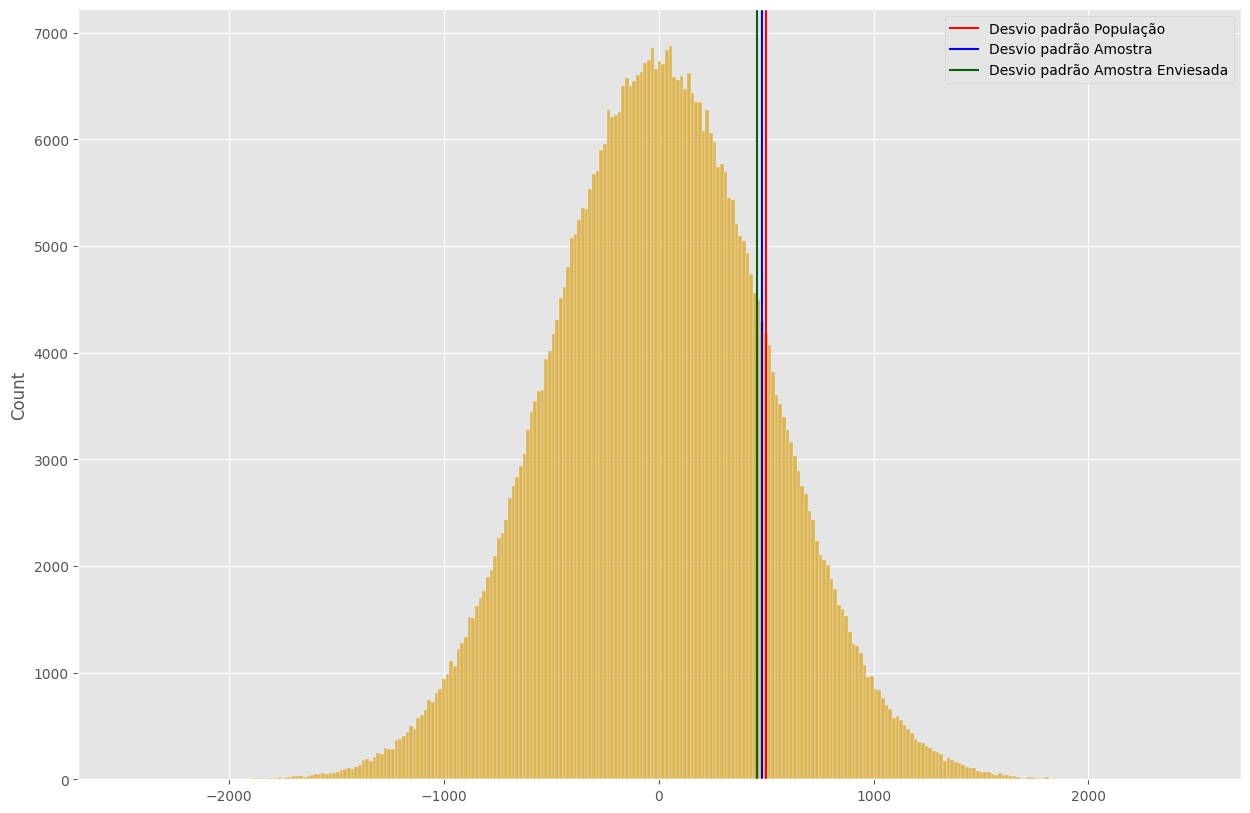

In [42]:
#Plotando o primeiro gráfico da distribuição normal e os desvios padrões

plt.style.use('ggplot');
plt.figure(figsize=(15,10));
sns.histplot(populacao, color = "goldenrod");
plt.axvline(stand_dev_pop, color = "red", label = "Desvio padrão População");
plt.axvline(stand_dev_samp, color = "blue", label = "Desvio padrão Amostra");
plt.axvline(stand_dev_env, color = "darkgreen",label = "Desvio padrão Amostra Enviesada");
plt.legend();
plt.show();

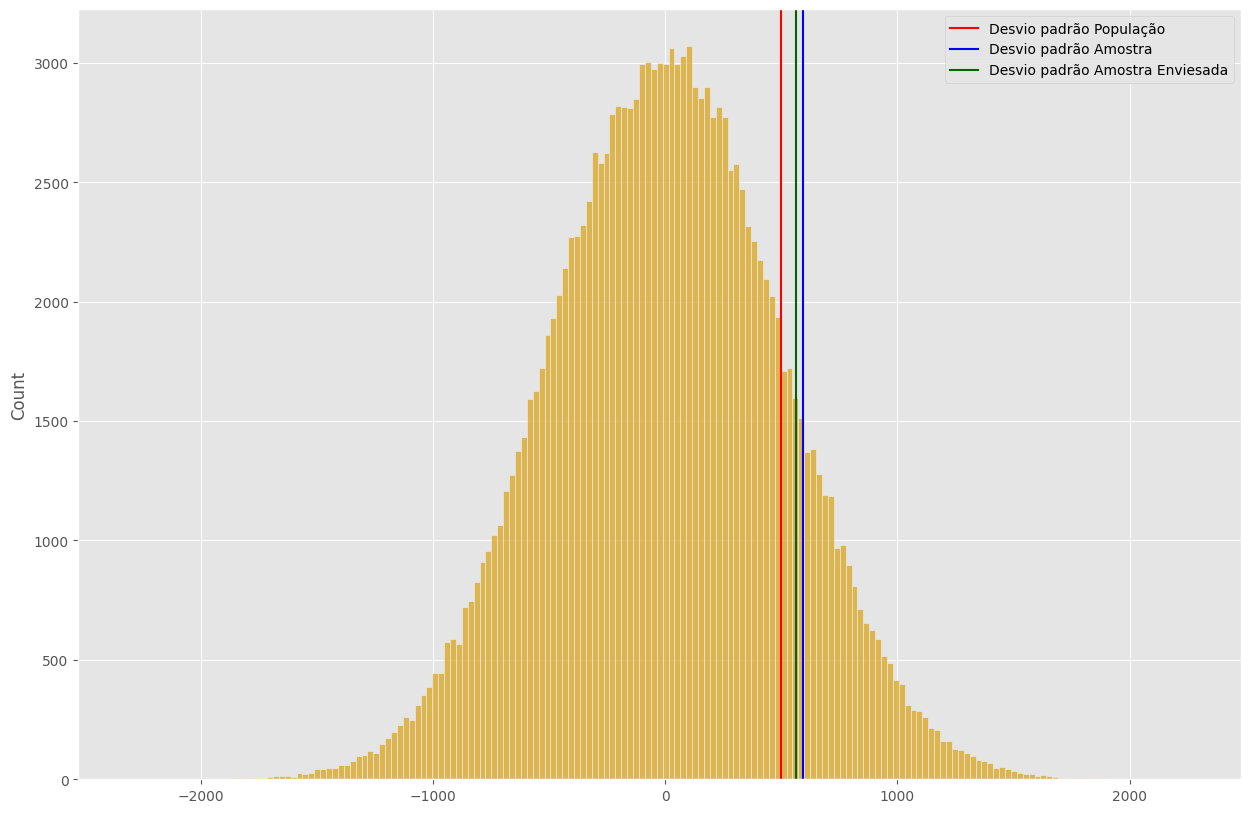

In [44]:
#Plotando o segundo gráfico da distribuição normal e os desvios padrões

plt.figure(figsize=(15,10));
sns.histplot(populacao2, color = "goldenrod");
plt.axvline(stand_dev_pop2, color = "red", label = "Desvio padrão População");
plt.axvline(stand_dev_samp2, color = "blue", label = "Desvio padrão Amostra");
plt.axvline(stand_dev_env2, color = "darkgreen",label = "Desvio padrão Amostra Enviesada");
plt.legend();
plt.show();